<a href="https://colab.research.google.com/github/LamaElkhouk/pythonh3hitema/blob/main/Projet_analyse_donn%C3%A9es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projet**

Mon projet consiste à étudier un jeu de données présentant des individus, des étudiants pour étudier et analyser leur santé mental et je souhaite savoir si il y'a un lien entre les differents resultats de ses étudiants et leurs note moyenne !

**Si oui**, serait-il possible d'identifier quels sont le/le(s) groupe(s) d'étudiant(s) le(s) plus toucher par cette influence


In [217]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

df= pd.read_csv('/Student_Mental_health.csv');


# number of rows
rows = len(df.axes[0])
 
# number of columns
cols = len(df.axes[1])

print("Number of Rows: ", rows)
print("Number of Columns: ", cols)
df.head() 


Number of Rows:  101
Number of Columns:  11


,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


**Les données (variables) constituant mon dataframe : **



In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

On étudie un échantillon de 101 étudiants ayant 11 caractéristiques:

 => **personnelles** : 
 
 age, domaine d'études, son année d'étude, sa moyenne globale (CGPA = A=4 B=3 C=2 D=1 et F=0) et son état civil.

 => **En rapport avec leur santé mentale**:
 
  Est ce qu'ils sont en dépression? ressent-ils de l'anxiété ? ont-ils déja eu une crise de panique? ont-ils consulté un spécialiste pour un traitement?

=> Il y'a également la toute premiere caractéristique **"timestamp"**,qui selon n'est pas une variable pertinente pour l'étude, elle représente la date et heure à laquel chaque étudiant à été interroger.

Le dataframe est constitué principalement de **variables qualitatives** de type Object (string) et d'**une variable quantitative** "l'age", qui est de type float.


**Dataframe en version plus simplifier**



In [219]:

#J'ai renommé les noms de variables
df.rename(columns = {'Choose your gender':'gender','What is your course?':'course','Your current year of Study':'current year','What is your CGPA?':'CGPA','Do you have Depression?':'depression', 'Do you have Anxiety?':'anxiety','Do you have Panic attack?':'panic attack','Did you seek any specialist for a treatment?':'specialist for a treatment'}, inplace = True)



In [224]:
note_moyenne=[]

for i in df['CGPA']:
    i=i.split()
    moyenne=(float(i[0])+float(i[2]))/2
    note_moyenne.append(moyenne)



#df.insert(6,"note moyenne",1)

df['note moyenne']=note_moyenne

df.head(10)


#sb.catplot(x="note_moyenne", y="depression", data = df, kind= "box", height=7)


,Timestamp,gender,Age,course,current year,CGPA,Marital status,depression,anxiety,panic attack,specialist for a treatment,note moyenne
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,3.245
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No,3.245
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,3.245
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No,3.245
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No,3.245
5,8/7/2020 12:31,Male,19.0,Engineering,Year 2,3.50 - 4.00,No,No,No,Yes,No,3.750
6,8/7/2020 12:32,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No,3.750
7,8/7/2020 12:33,Female,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No,3.750
8,8/7/2020 12:35,Female,19.0,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,No,2.745
9,8/7/2020 12:39,Male,18.0,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No,3.750


**Peut-on décrire la note moyenne par rapport à depression ? panic attack et anxiety?**

In [221]:
df['note moyenne'].describe()

count    101.000000
mean       3.356287
std        0.585152
min        0.995000
25%        3.245000
50%        3.245000
75%        3.750000
max        3.750000
Name: note moyenne, dtype: float64

la moyenne des notes est  de 3.35 

l'écart-type : 0.58

donc les notes vont de 2.77 à 3.93 qui sont plutot de bonne notes!

max => 3.75 == 100%
0.58 represente 15.46% de 3.75% qui est plutot faible mais on ne peut pas vraiment conclure qu'elle soit significative

Correlation entre la variable qui décrit **la note_moyenne** de chaque étudiant avec la variable chacune des variables qui décrit si oui ou non il est anxieux, **anxiety**, si oui ou non il est en **depression** et si oui ou non il a des crises de panique, **panic attack**

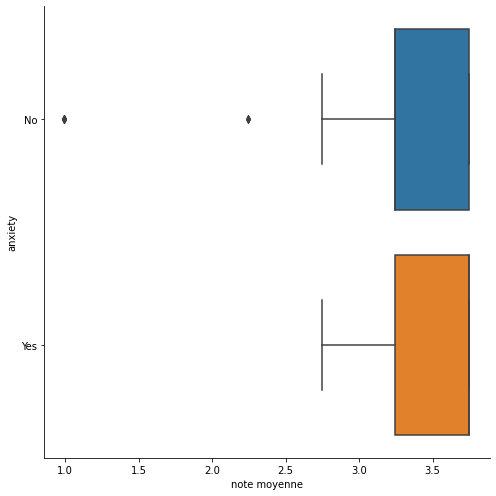

In [230]:

#sb.catplot(y="note moyenne", x="anxiety", data= df, kind="bar", height=5, aspect=1)
sb.catplot(y="anxiety", x="note moyenne", data = df, kind= "box", height=7)



on a deux valeurs aberrantes => il existe des individus ne souffrant d'anxiété et n'ayant pas de bonnes notes

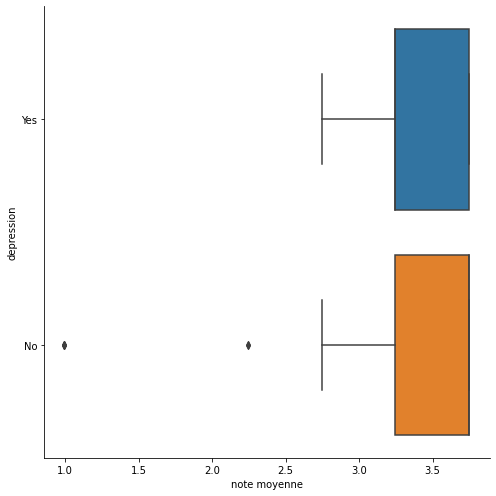

In [195]:
sb.catplot(y="depression", x="note moyenne", data = df, kind= "box", height=7)

on a deux valeurs aberrantes => deux individus ayant une note inferieur a 2.5 et ne souffre pas d'anxiété ...

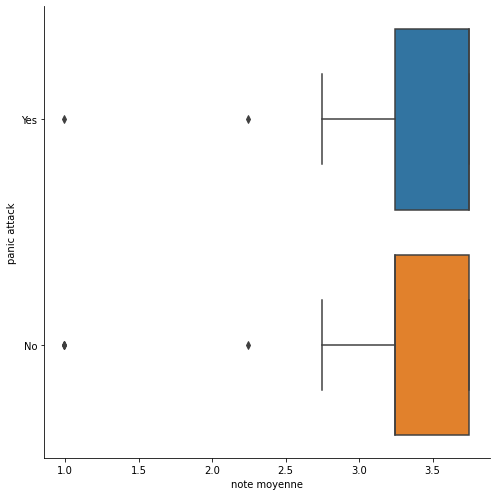

In [196]:
sb.catplot(y="panic attack", x="note moyenne", data = df, kind= "box", height=7)

quatres valeurs aberrantes => il existe des étudiants ayant des notes inferieur a 2.5 , certain d'entre eux souffre de crise de panic d'autres non

**Suppresion des valeurs aberrantes**

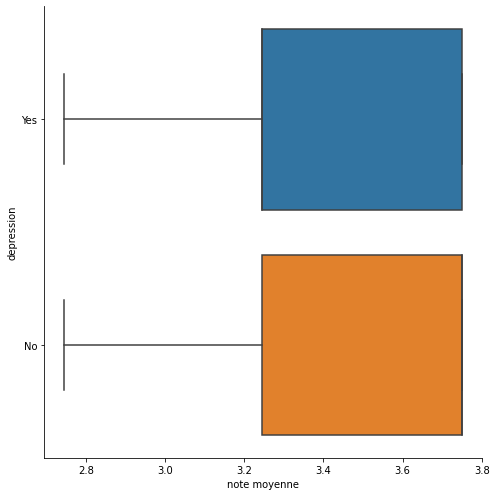

In [203]:

new_df = df[ df['note moyenne'] > 2.5] 
sb.catplot(x="note moyenne", y="depression", data = new_df, kind= "box", height=7)



absence de mediane => 50 % souffrent de depression et les autres 50% non

50% ont des bonnes notes se situant entre 3.6 et 3.8 ! 

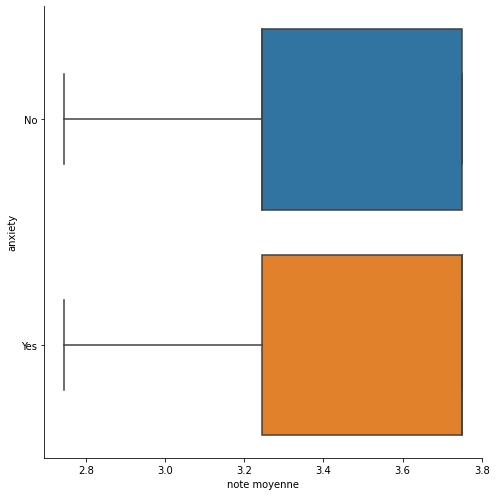

In [198]:
sb.catplot(x="note moyenne", y="anxiety", data = new_df, kind= "box", height=7)

absence de mediane => 50 % souffrent d'anxiété et les autres 50% non

50% ont des bonnes notes se situant entre 3.6 et 3.8 ! 

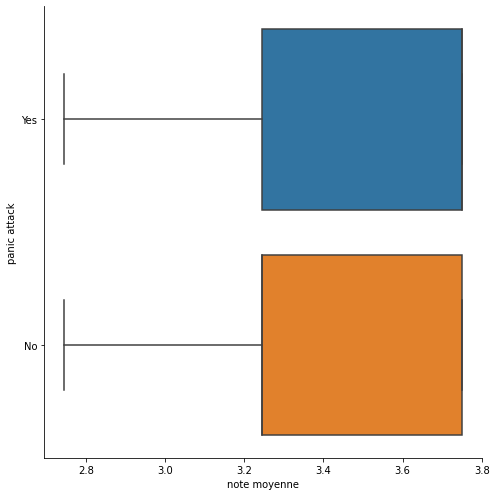

In [199]:
sb.catplot(x="note moyenne", y="panic attack", data = new_df, kind= "box", height=7)

absence de mediane => 50 % souffrent  de crise de panique  et les autres 50% non

50% ont des bonnes notes se situant entre 3.6 et 3.8 ! 

J'ai converti mes variables quantitatives en variables qualitatives

In [233]:
#J'ai remplacé les 'yes' et 'No' par 1 et 0
df['depression']= df['depression'].replace(['Yes','No'],[1,0])
df['anxiety']= df['anxiety'].replace(['Yes','No'],[1,0])
df['panic attack']= df['panic attack'].replace(['Yes','No'],[1,0])
df['specialist for a treatment']= df['specialist for a treatment'].replace(['Yes','No'],[1,0])
df['Marital status']= df['Marital status'].replace(['Yes','No'],[1,0])


**y'a t-il correlation entre les notes et la depression?**

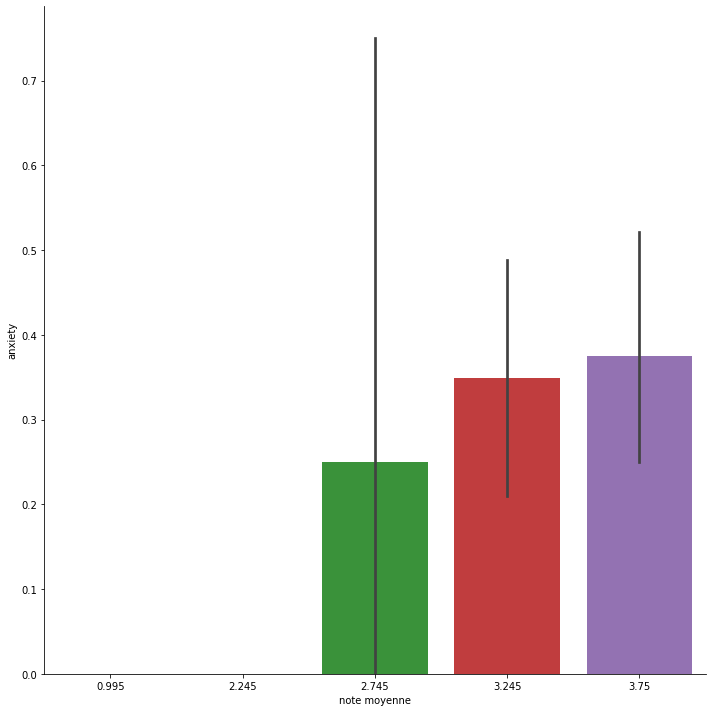

In [241]:
sb.catplot(x="note moyenne", y="anxiety", data= df, kind="bar", height=10)

36 % ont des notes se situant aux alentours de 3.75 

les ecarts-types sont énormes donc les deux variables ne sont pas correler

plus un étudiant à de bonnes notes, plus il souffre anxiété

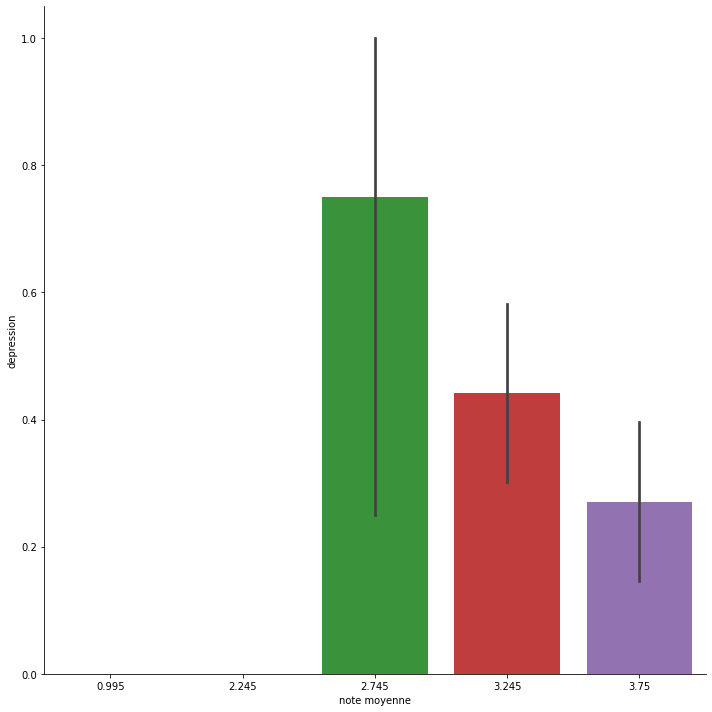

In [242]:
sb.catplot(x="note moyenne", y="depression", data= df, kind="bar", height=10)

30 % ont des notes se situant aux alentours de 3.75 

les ecarts-types sont énormes donc les deux variables ne sont pas correler

plus un étudiant à de bonnes notes, plus il souffre de depression

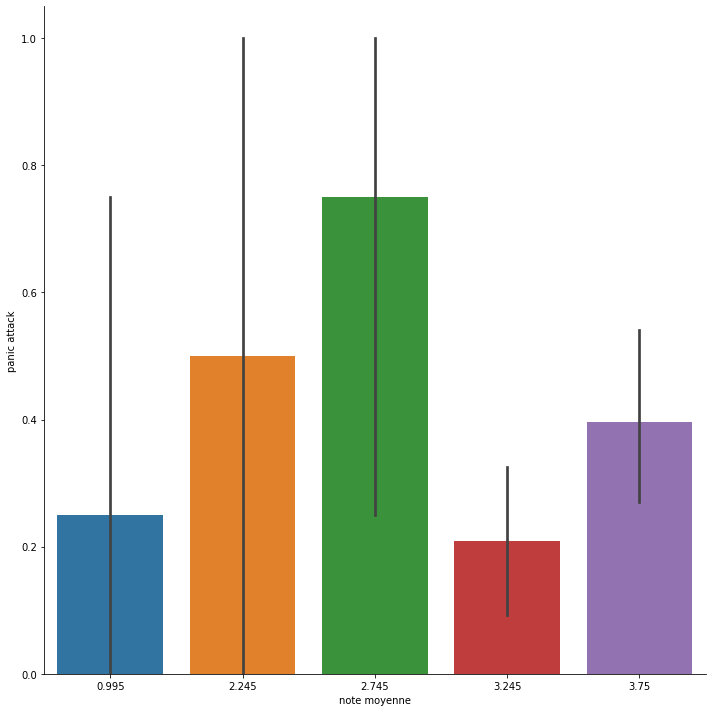

In [243]:
sb.catplot(x="note moyenne", y="panic attack", data= df, kind="bar", height=10)

40 % ont des notes se situant aux alentours de 3.75 

les ecarts-types sont énormes donc les deux variables ne sont pas correler

qu'ils aient de bonne notes ou pas , il y'a des etudiant qui souffre crise de panique

**matrice et heatmap**

In [251]:
matrice=df.corr()
matrice

,Age,Marital status,depression,anxiety,panic attack,specialist for a treatment,note moyenne
Age,1.000000,0.104551,-0.072171,-0.093661,0.055741,0.047808,0.005610
Marital status,0.104551,1.000000,0.595784,0.092606,0.275909,0.349819,0.035134
depression,-0.072171,0.595784,1.000000,0.273764,0.246842,0.345105,0.041807
anxiety,-0.093661,0.092606,0.273764,1.000000,0.084478,0.086880,0.172950
panic attack,0.055741,0.275909,0.246842,0.084478,1.000000,0.182145,0.042511
specialist for a treatment,0.047808,0.349819,0.345105,0.086880,0.182145,1.000000,0.025342
note moyenne,0.005610,0.035134,0.041807,0.172950,0.042511,0.025342,1.000000


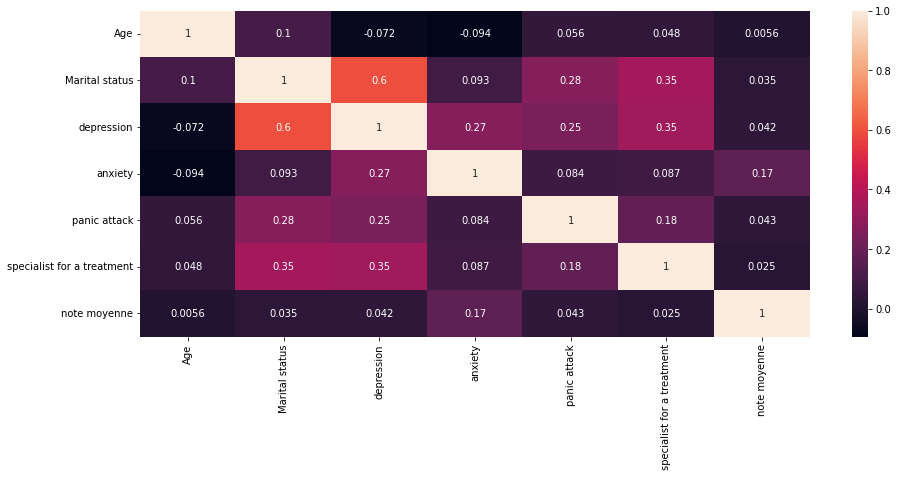

In [250]:
plt.figure(figsize=(15,6))
sb.heatmap(matrice, annot=True)

il est vrai que la note n'a pas d'influence sur l'anxité, la depression et la crise de panique..mais de ce qu'on peut en conclure de notre heatmap ! la santé mentale est plus relier a sa vie sentimentale et non lié a ses études, les étudiants souffrent de dépression à cause de leur celiba... mais cela n'influe en aucun cas les notes..

**Conclusion**

Comme on a pu le constaté **avec** ce jeu de données qui  presente la situation de 100 étudiants , plus un étudiants est anxieux , a des crise de panique ou/et qui est en depression, il aura tendance à avoir de bonnes notes, cela peut etre expliquer par le fait d'avoir peur d'échouer ! ou alors que sa dépression est dû a d'autres facteurs et que cela n'influence pas ses études , que les étudiants qui n'ont pas de bonnes notes ne sont peut etre pas interessés par ce qu'ils font et donc souhaite faire autres choses de leurs vie ou voir meme se réorienté!

s'ajoute a cela le fait qu'on a fait cette etude uniquement sur 101 étudiants , il aurait fallut avoir plus de données, voir verié et interroger des étudiants de d'autres région ?

donc pour conclure, on ce qui concerne cet échantillon, la santé mentale n'a finalement pas un effet negatif sur les notes de la majorité des étudiants